<a href="https://colab.research.google.com/github/tesygithub/Machine-Learning/blob/main/Movie_Recommendation_System(cosine_similarity%2Cdifflib%2CTfidfVectorizer).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Movie Recommendation System**

### **Import Dependancy**

In [1]:
import pandas as pd
import numpy as np
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## **Data Collection**

In [3]:
df = pd.read_csv('/content/Copy of Copy of movies.csv')

In [4]:
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [5]:
df.shape

(4803, 24)

In [6]:
df.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [7]:
features = ['genres','keywords','tagline','cast','director']

In [8]:
features

['genres', 'keywords', 'tagline', 'cast', 'director']

### **Dealing with null value**

In [9]:
df.isnull().sum()

,0
index,0
budget,0
genres,28
homepage,3091
id,0
keywords,412
original_language,0
original_title,0
overview,3
popularity,0


In [10]:
for feature in features:
  df[feature] = df[feature].fillna('')

In [11]:
df.isnull().sum()

,0
index,0
budget,0
genres,0
homepage,3091
id,0
keywords,0
original_language,0
original_title,0
overview,3
popularity,0


### **Combine features**

In [12]:
combine_features = df['genres']+' '+df['keywords']+' '+df['tagline']+' '+df['cast']+' '+df['director']
combine_features

,0
0,Action Adventure Fantasy Science Fiction cultu...
1,Adventure Fantasy Action ocean drug abuse exot...
2,Action Adventure Crime spy based on novel secr...
3,Action Crime Drama Thriller dc comics crime fi...
4,Action Adventure Science Fiction based on nove...
...,...
4798,Action Crime Thriller united states\u2013mexic...
4799,Comedy Romance A newlywed couple's honeymoon ...
4800,Comedy Drama Romance TV Movie date love at fir...
4801,A New Yorker in Shanghai Daniel Henney Eliza...


## **Converting text data into num data**

In [13]:
vector = TfidfVectorizer()
feature_vector = vector.fit_transform(combine_features)
print(feature_vector)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 124266 stored elements and shape (4803, 17318)>
  Coords	Values
  (0, 201)	0.07860022416510505
  (0, 274)	0.09021200873707368
  (0, 5274)	0.11108562744414445
  (0, 13599)	0.1036413987316636
  (0, 5437)	0.1036413987316636
  (0, 3678)	0.21392179219912877
  (0, 3065)	0.22208377802661425
  (0, 5836)	0.1646750903586285
  (0, 14378)	0.33962752210959823
  (0, 16587)	0.12549432354918996
  (0, 3225)	0.24960162956997736
  (0, 14271)	0.21392179219912877
  (0, 4945)	0.24025852494110758
  (0, 15261)	0.07095833561276566
  (0, 16998)	0.1282126322850579
  (0, 11192)	0.09049319826481456
  (0, 11503)	0.27211310056983656
  (0, 13349)	0.15021264094167086
  (0, 17007)	0.23643326319898797
  (0, 17290)	0.20197912553916567
  (0, 13319)	0.2177470539412484
  (0, 14064)	0.20596090415084142
  (0, 16668)	0.19843263965100372
  (0, 14608)	0.15150672398763912
  (0, 8756)	0.22709015857011816
  :	:
  (4801, 403)	0.17727585190343229
  (4801, 4835)	0.247137650

In [14]:
feature_vector.shape

(4803, 17318)

## **Similarity scores using cosine similarity**

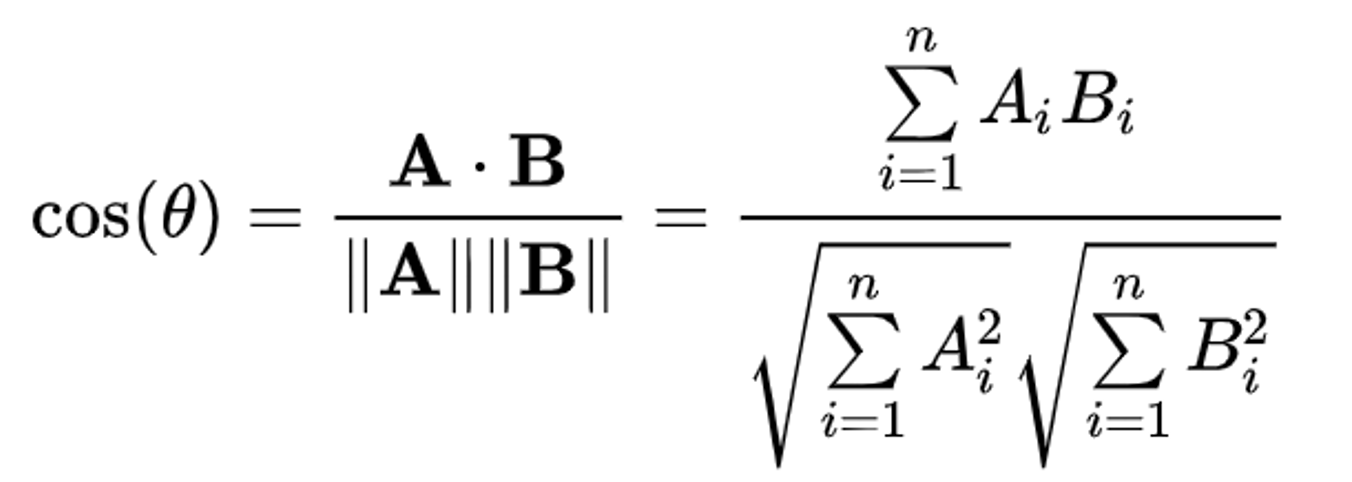

In [15]:
similarity = cosine_similarity(feature_vector)

In [16]:
print(similarity)

[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


In [17]:
similarity.shape

(4803, 4803)

## **Getting movie name from user**

In [18]:
movie_name = 'bat man'

### **creating a list with all the movie names given in the dataset**

In [19]:
list_of_all_title = df['title'].tolist()
print(list_of_all_title)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

### **Finding close match for the movie name given by user**

In [20]:
find_close_match = difflib.get_close_matches(movie_name, list_of_all_title)
print(find_close_match)

['Batman', 'Batman', 'Catwoman']


In [21]:
close_match = find_close_match[0]
print(close_match)

Batman


In [22]:
index_of_movie = df[df.title == close_match]['index'].values[0]
print(index_of_movie)

1359


In [23]:
df['title'][index_of_movie]

'Batman'

### **GETTING THE SIMILER MOVIES**

In [24]:
similar_score = list(enumerate(similarity[index_of_movie]))
print(similar_score)

[(0, np.float64(0.025315122697371115)), (1, np.float64(0.049832930643991497)), (2, np.float64(0.013599520029326729)), (3, np.float64(0.20438773732168228)), (4, np.float64(0.024929726723526918)), (5, np.float64(0.11533013884014888)), (6, np.float64(0.0)), (7, np.float64(0.005521938648290495)), (8, np.float64(0.030934935200526422)), (9, np.float64(0.08976169961638153)), (10, np.float64(0.1124085019852625)), (11, np.float64(0.011808001891564553)), (12, np.float64(0.03825857693295372)), (13, np.float64(0.013263747027865664)), (14, np.float64(0.12815026535769383)), (15, np.float64(0.010432758242497994)), (16, np.float64(0.005235971636780311)), (17, np.float64(0.01601669810036477)), (18, np.float64(0.041538815515852534)), (19, np.float64(0.02968626711977731)), (20, np.float64(0.02521005401012206)), (21, np.float64(0.004591239318101996)), (22, np.float64(0.01792276874908081)), (23, np.float64(0.024870438166594427)), (24, np.float64(0.041865507456289)), (25, np.float64(0.0)), (26, np.float64(0

In [25]:
print(len(similar_score))

4803


### **Sort similar_score**

In [26]:
sorted_movie_score = sorted(similar_score, key = lambda x:x[1], reverse = True)
print(sorted_movie_score)

[(1359, np.float64(1.0)), (428, np.float64(0.4311643836232694)), (210, np.float64(0.2573799982085963)), (3, np.float64(0.20438773732168228)), (119, np.float64(0.1926252875715041)), (65, np.float64(0.17755815066113925)), (1512, np.float64(0.14705162654306447)), (813, np.float64(0.1441412830396247)), (2530, np.float64(0.1373732247372919)), (1017, np.float64(0.13713281929528848)), (473, np.float64(0.13217075714794208)), (753, np.float64(0.13216136203404205)), (278, np.float64(0.12996260715124028)), (14, np.float64(0.12815026535769383)), (72, np.float64(0.12266571244563479)), (2313, np.float64(0.1183433298876972)), (2381, np.float64(0.11752380293327758)), (5, np.float64(0.11533013884014888)), (2858, np.float64(0.11413652180839842)), (4183, np.float64(0.11353876531321921)), (30, np.float64(0.11336219425554916)), (2655, np.float64(0.11270953916613298)), (10, np.float64(0.1124085019852625)), (1035, np.float64(0.11197582745207196)), (2685, np.float64(0.10980421440315517)), (870, np.float64(0.1

In [27]:
df['title'][68]

'Iron Man'

In [28]:
df['title'][79]

'Iron Man 2'

In [29]:
df['title'][31]

'Iron Man 3'

In [30]:
df['title'][7]

'Avengers: Age of Ultron'

In [31]:
k = []
for i,j in sorted_movie_score:
  k.append(df['title'][i])

for i in range(0,30):
  print(k[i])

Batman
Batman Returns
Batman & Robin
The Dark Knight Rises
Batman Begins
The Dark Knight
A History of Violence
Superman
Beetlejuice
Bedazzled
Mars Attacks!
The Sentinel
Planet of the Apes
Man of Steel
Suicide Squad
The Mask
Salton Sea
Spider-Man 3
The Postman Always Rings Twice
Hang 'em High
Spider-Man 2
Dungeons & Dragons: Wrath of the Dragon God
Superman Returns
Jonah Hex
Exorcist II: The Heretic
Superman II
Green Lantern
Superman III
Something's Gotta Give
Reds
